## Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

## Load Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
# Reshape
y_train = y_train.reshape(-1, )
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [6]:
classes = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

## Observe Dataset 

In [7]:
def ShowImage(x, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

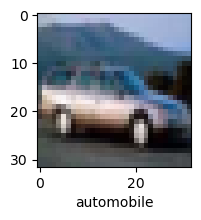

In [8]:
ShowImage(X_train, y_train, 4)

## Normalize Dataset

In [9]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## Model Creation

In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=34, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

## Compile Model

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training Model

In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 93s 55ms/step - loss: 1.5134 - accuracy: 0.4503 - val_loss: 1.2607 - val_accuracy: 0.5561
Epoch 2/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.1625 - accuracy: 0.5894 - val_loss: 1.0622 - val_accuracy: 0.6223
Epoch 3/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0202 - accuracy: 0.6434 - val_loss: 1.0323 - val_accuracy: 0.6438
Epoch 4/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.9382 - accuracy: 0.6758 - val_loss: 0.9903 - val_accuracy: 0.6566
Epoch 5/10
1563/1563 [==============================] - 84s 53ms/step - loss: 0.8755 - accuracy: 0.6975 - val_loss: 0.9689 - val_accuracy: 0.6663
Epoch 6/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.8228 - accuracy: 0.7161 - val_loss: 0.9466 - val_accuracy: 0.6694
Epoch 7/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.7810 - accuracy: 0.7296 - val_loss: 0.9003 -

## Make Predictions

In [24]:
y_predict = model.predict(X_test)

313/313 [==============================] - 6s 20ms/step


In [25]:
y_predict[9]

array([9.9897559e-04, 8.6098236e-01, 1.2696347e-04, 2.0882231e-04,
       2.4989896e-04, 5.5124940e-05, 1.2341514e-03, 3.7975769e-05,
       1.1712871e-03, 1.3493440e-01], dtype=float32)

In [26]:
y_predict = [np.argmax(arr) for arr in y_predict]

In [27]:
y_test = y_test.reshape(-1, )

In [28]:
m_predict = y_predict[9]

In [29]:
print(f'The model prediction is {classes[m_predict]}.')

The model prediction is automobile.


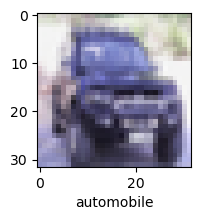

In [30]:
ShowImage(X_test, y_test, 9)